In [1]:
import matplotlib.pyplot as plt
import pandas
from pandas import *

In [2]:
data_frame: DataFrame = pandas.read_csv('data/results.csv')

# Plotting a line chart of the scores of England team over time, when England played as a home team between 1872 and 1882

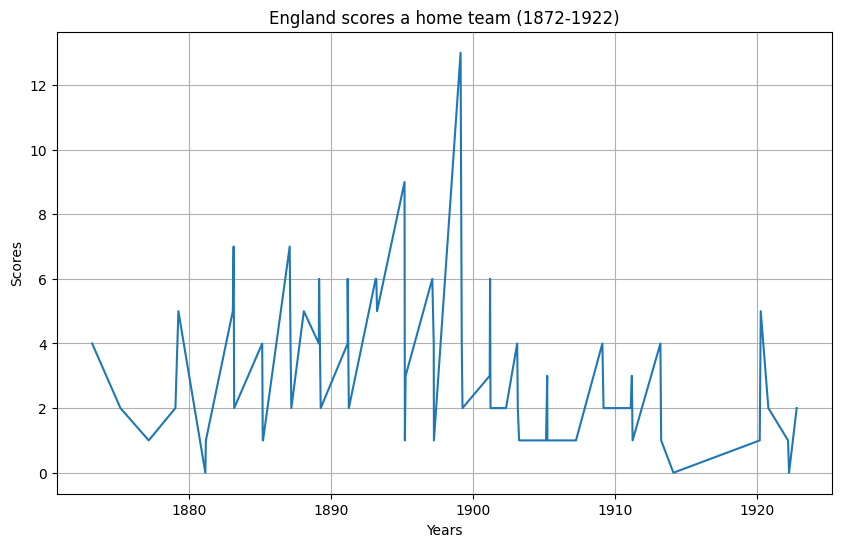

In [3]:
def line() -> None:
    data_frame['date'] = pandas.to_datetime(data_frame['date'])
    filtered_df = data_frame[(data_frame['home_team'] == 'England') 
                             & (data_frame['date'].dt.year >= 1872) 
                             & (data_frame['date'].dt.year <= 1922)]
    plt.figure(figsize=(10,6))
    plt.plot(filtered_df['date'], filtered_df['home_score'])
    plt.xlabel('Years')
    plt.ylabel('Scores')
    plt.title('England scores a home team (1872-1922)')
    plt.grid(True)
    plt.show()

line()

# Plotting a dot chart of the scores of Scotland team over time, when Scotland played as an away team between 1872 and 1922

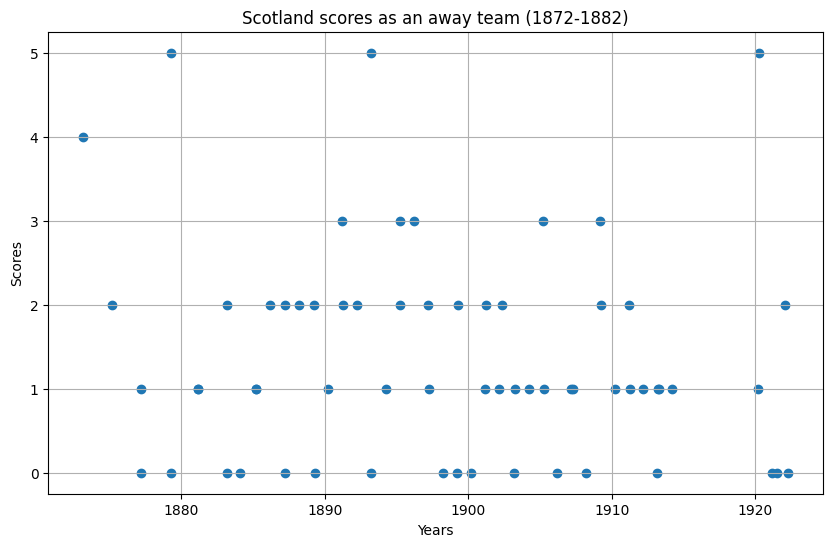

In [4]:
def dots() -> None:
    data_frame['date'] = pandas.to_datetime(data_frame['date'])
    filtered_df = data_frame[(data_frame['away_team'] == 'Scotland') 
                             & (data_frame['date'].dt.year >= 1872) 
                             & (data_frame['date'].dt.year <= 1922)]
    plt.figure(figsize=(10,6))
    plt.scatter(filtered_df['date'], filtered_df['home_score'])
    plt.xlabel('Years')
    plt.ylabel('Scores')
    plt.title('Scotland scores as an away team (1872-1882)')
    plt.grid(True)
    plt.show()

dots()

# Plotting a pie chart of percentage of games played by England, Scotland, Wales when playing as a home team

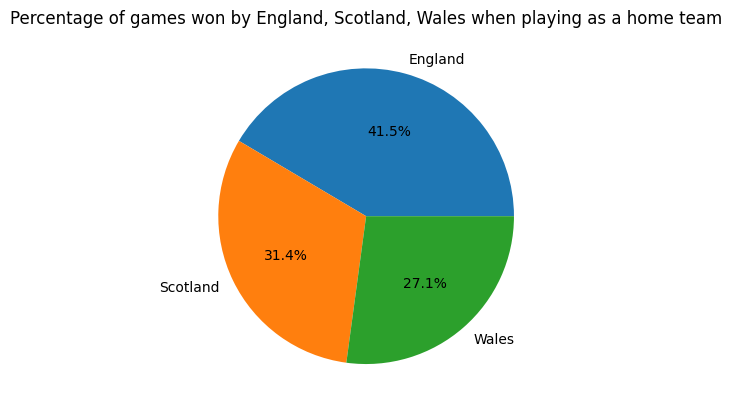

In [5]:
def pie() -> None:
    filtered_df = data_frame[data_frame['home_team'].isin(['England', 'Scotland', 'Wales'])]
    win_counts = filtered_df['home_team'].value_counts() # TODO: check if this is correct
    
    total_games = win_counts.sum()
    percentages = win_counts / total_games * 100

    labels = percentages.index
    sizes = percentages.values
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax.set_aspect('equal')
    plt.title('Percentage of games won by England, Scotland, Wales when playing as a home team')
    plt.show()

pie()

# Plotting a bar chart of the number of games played by England, Scotland, Wales when playing as a home team between 

/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_21693/206599659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pandas.to_datetime(filtered_df['date']).dt.year


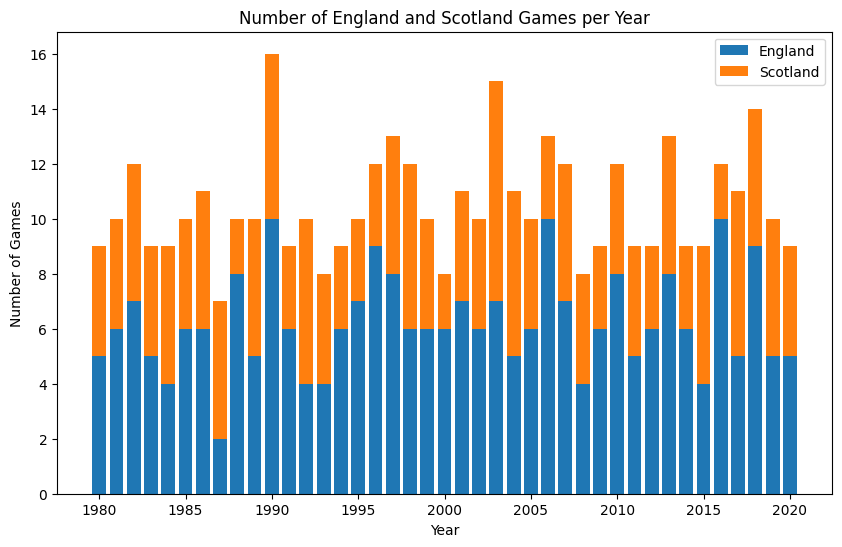

In [6]:
def bar():
    filtered_df = data_frame[data_frame['home_team'].isin(['England', 'Scotland'])]
    filtered_df['year'] = pandas.to_datetime(filtered_df['date']).dt.year
    games_per_year = filtered_df.groupby(['year', 'home_team']).size().unstack()
    years = range(1980, 2021)
    england_counts = []
    scotland_counts = []

    for year in years:
        england_count = games_per_year.loc[year, 'England'] if year in games_per_year.index else 0
        scotland_count = games_per_year.loc[year, 'Scotland'] if year in games_per_year.index else 0
        england_counts.append(england_count)
        scotland_counts.append(scotland_count)

    plt.figure(figsize=(10, 6))
    plt.bar(years, england_counts, label='England')
    plt.bar(years, scotland_counts, bottom=england_counts, label='Scotland')
    plt.xlabel('Year')
    plt.ylabel('Number of Games')
    plt.title('Number of England and Scotland Games per Year')
    plt.legend()
    plt.show()

bar()

/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_21693/1869493797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_data['date'] = pandas.to_datetime(england_data['date'])
/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_21693/1869493797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_data['decade'] = england_data['date'].dt.year // 10 * 10


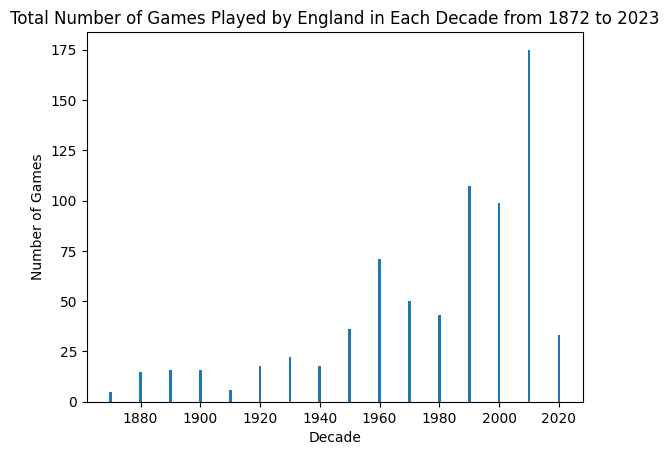

In [8]:
def histogram():
    england_data = data_frame[data_frame['country'] == 'England']
    england_data['date'] = pandas.to_datetime(england_data['date'])
    england_data['decade'] = england_data['date'].dt.year // 10 * 10
    games_per_decade = england_data.groupby('decade').size()
    
    plt.bar(games_per_decade.index, games_per_decade.values, width=0.9)  # Adjust the width parameter    
    plt.xlabel('Decade')
    plt.ylabel('Number of Games')
    plt.title('Total Number of Games Played by England in Each Decade from 1872 to 2023')
    plt.show()

histogram()